In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('data_science_salaries.csv').

In [5]:
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [14]:
df.columns

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')

In [6]:
df.isnull().sum()

job_title             0
experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary                0
salary_currency       0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64

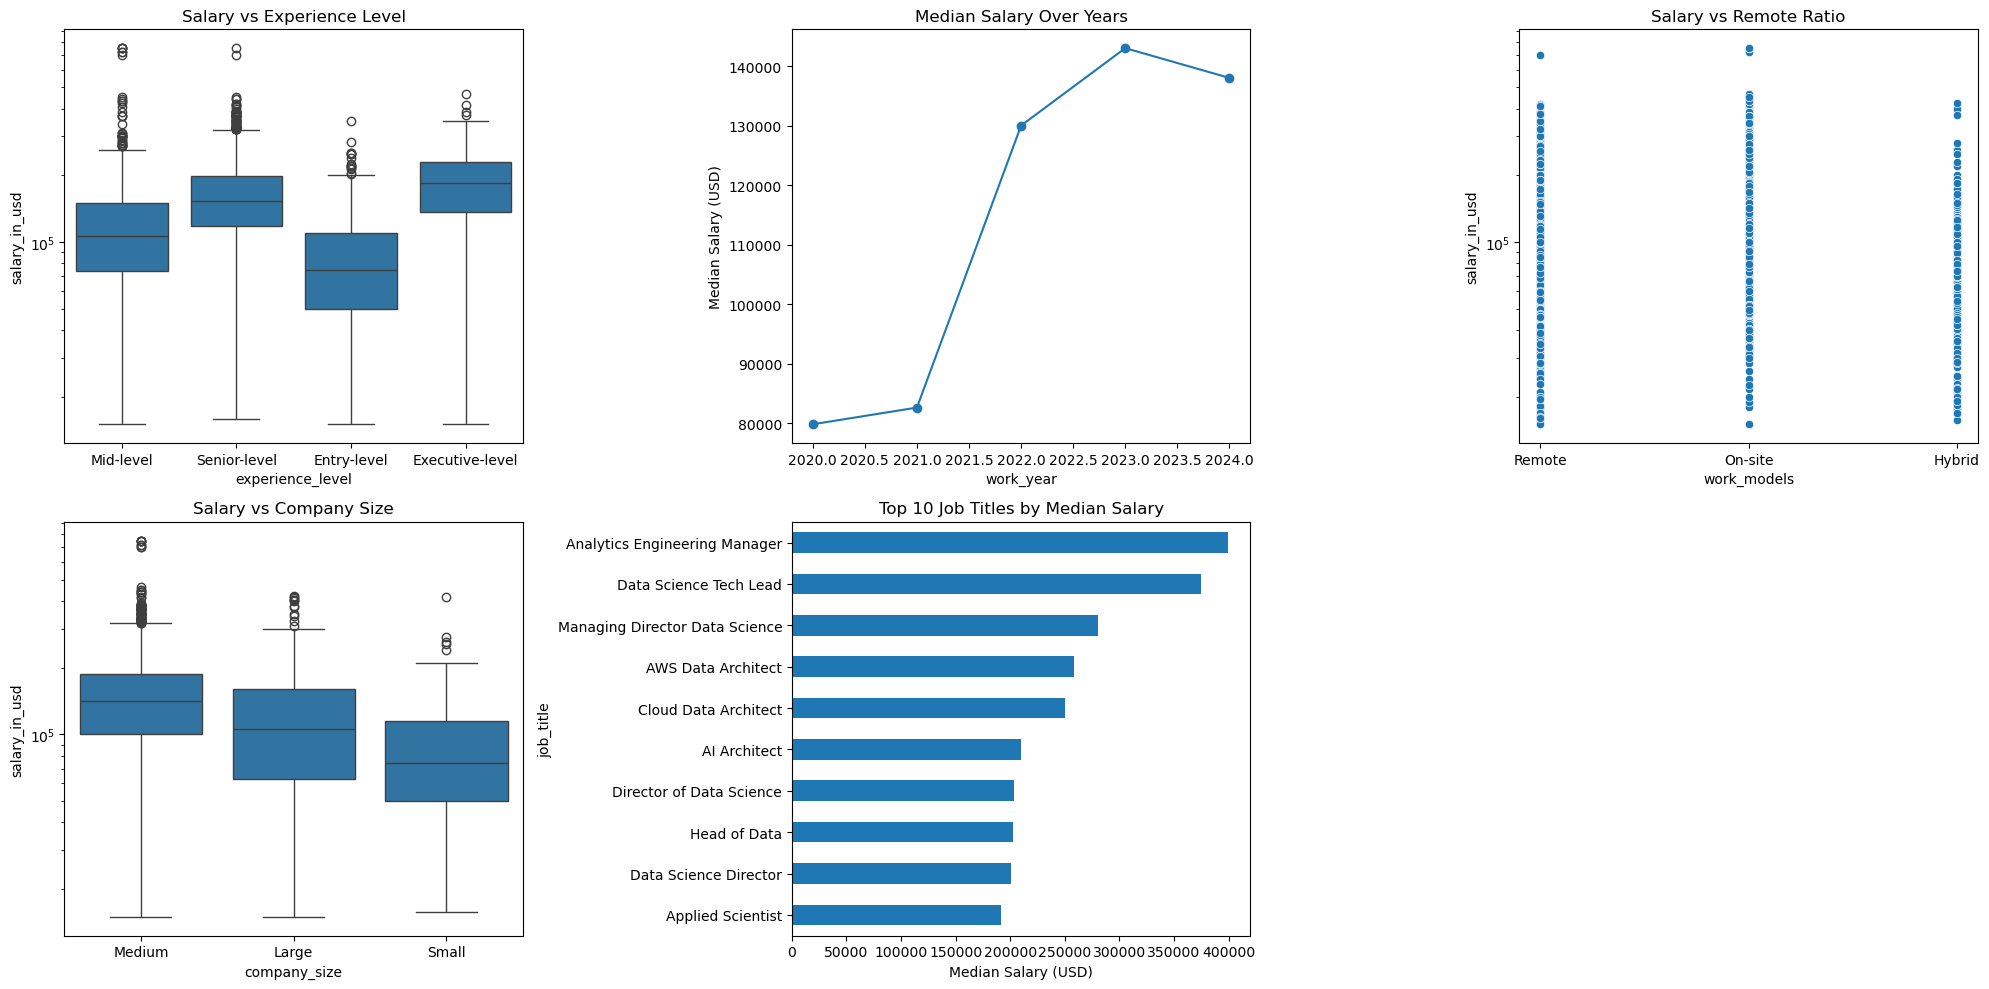

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# ===== 第 1 行 =====

# Salary vs Experience Level
sns.boxplot(
    x="experience_level",
    y="salary_in_usd",
    data=df,
    ax=axes[0, 0]
)
axes[0, 0].set_title("Salary vs Experience Level")
axes[0, 0].set_yscale("log")

# Median Salary Over Years
df.groupby("work_year")["salary_in_usd"].median().plot(
    marker="o",
    ax=axes[0, 1]
)
axes[0, 1].set_title("Median Salary Over Years")
axes[0, 1].set_ylabel("Median Salary (USD)")

# Salary vs Work Models
sns.scatterplot(
    data=df,
    x="work_models",
    y="salary_in_usd",
    ax=axes[0, 2]
)
axes[0, 2].set_title("Salary vs Remote Ratio")
axes[0, 2].set_yscale("log")

# second 

# Salary vs Company Size
sns.boxplot(
    data=df,
    x="company_size",
    y="salary_in_usd",
    ax=axes[1, 0]
)
axes[1, 0].set_title("Salary vs Company Size")
axes[1, 0].set_yscale("log")

# Top 10 Job Titles by Median Salary
top_jobs = (
    df.groupby("job_title")["salary_in_usd"]
    .median()
    .sort_values(ascending=False)
    .head(10)
)

top_jobs.plot(
    kind="barh",
    ax=axes[1, 1]
)
axes[1, 1].set_title("Top 10 Job Titles by Median Salary")
axes[1, 1].set_xlabel("Median Salary (USD)")
axes[1, 1].invert_yaxis()

# empty
axes[1, 2].axis("off")

plt.tight_layout()
plt.show()

